# TP MEDICAL


### Init libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_fscore_support, accuracy_score
import plotly.express as px
import plotly.subplots as sp
# avoid displaying warnings 
import warnings
warnings.filterwarnings("ignore")


### Collect data

In [2]:
data = pd.read_csv("medical.csv", sep=';')


In [3]:
# Show first lines (head)
print(data.head(10))

           Disease Fever Cough Fatigue Difficulty Breathing  Age  Gender  \
0        Influenza   Yes    No     Yes                  Yes   19  Female   
1      Common Cold    No   Yes     Yes                   No   25  Female   
2           Eczema    No   Yes     Yes                   No   25  Female   
3           Asthma   Yes   Yes      No                  Yes   25    Male   
4           Asthma   Yes   Yes      No                  Yes   25    Male   
5           Eczema   Yes    No      No                   No   25  Female   
6        Influenza   Yes   Yes     Yes                  Yes   25  Female   
7        Influenza   Yes   Yes     Yes                  Yes   25  Female   
8  Hyperthyroidism    No   Yes      No                   No   28  Female   
9  Hyperthyroidism    No   Yes      No                   No   28  Female   

  Blood Pressure Cholesterol Level Outcome Variable  
0            Low            Normal         Positive  
1         Normal            Normal         Negative  
2

In [4]:
# Informations about data type and length
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
# Checking all the missing value in the data 
data.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

#### Cleaning data



In [6]:
### Delete data
print(f"Nombre de lignes avant suppression des doublons : {len(data)}")
df_cleaned = data.drop_duplicates()

print(f"Nombre de lignes après suppression des doublons : {len(df_cleaned)}")
print(f"Nombre de lignes supprimées : {len(data) - len(df_cleaned)}")
print(f"Pourcentage de données supprimées : {((len(data) - len(df_cleaned)) / len(data) * 100):.2f}%")

Nombre de lignes avant suppression des doublons : 349
Nombre de lignes après suppression des doublons : 300
Nombre de lignes supprimées : 49
Pourcentage de données supprimées : 14.04%


In [7]:
# Checking result
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Outcome Variable      300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


In [8]:
# Drop the missing values
df = df_cleaned.dropna()

In [9]:
# Drop Age and Gender (not needed)
df.drop ('Age', axis=1, inplace=True)
df.drop ('Gender', axis=1, inplace=True)

In [10]:
# Filter to keep positive data (Outcome Variable) where we need to verify only if diease is present 
df_positive = df[df['Outcome Variable'] == 'Positive'].copy()

print("Nombre total de cas:", len(df))
print("Nombre de cas positifs:", len(df_positive))
print("\nDistribution des maladies dans les cas positifs:")
print(df_positive['Disease'].value_counts())

Nombre total de cas: 300
Nombre de cas positifs: 157

Distribution des maladies dans les cas positifs:
Disease
Asthma               12
Stroke                7
Osteoporosis          6
Migraine              5
Influenza             5
                     ..
Mumps                 1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 77, dtype: int64


In [11]:
# Verify distributing disease
print("\n=== Distribution des maladies ===")
disease_counts = df_positive['Disease'].value_counts()
print(f"Nombre de maladies uniques: {len(disease_counts)}")
print(f"Nombre moyen d'échantillons par maladie: {len(df_positive)/len(disease_counts):.2f}")
print("\nTop 10 maladies les plus fréquentes:")
print(disease_counts.head(10))
 


=== Distribution des maladies ===
Nombre de maladies uniques: 77
Nombre moyen d'échantillons par maladie: 2.04

Top 10 maladies les plus fréquentes:
Disease
Asthma          12
Stroke           7
Osteoporosis     6
Migraine         5
Influenza        5
Pneumonia        5
Diabetes         5
Hypertension     5
Bronchitis       4
Liver Cancer     4
Name: count, dtype: int64


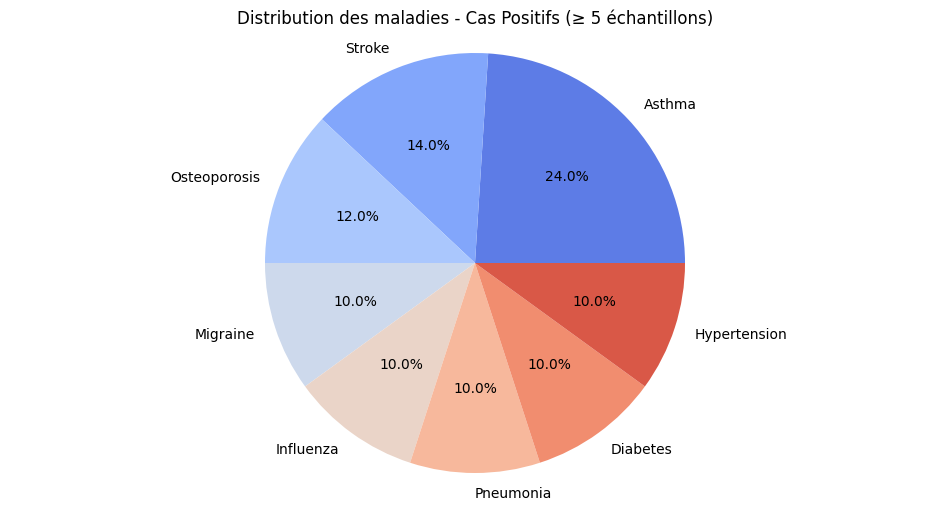


Statistiques des maladies sélectionnées (Cas Positifs):
Nombre total de maladies: 8

Détail par maladie:
Asthma: 12 échantillons (7.6%)
Stroke: 7 échantillons (4.5%)
Osteoporosis: 6 échantillons (3.8%)
Migraine: 5 échantillons (3.2%)
Influenza: 5 échantillons (3.2%)
Pneumonia: 5 échantillons (3.2%)
Diabetes: 5 échantillons (3.2%)
Hypertension: 5 échantillons (3.2%)


In [12]:
# Filter to keep diseas with >= 5 samples
min_samples = 5
disease_counts = df_positive['Disease'].value_counts()
disease_percent = disease_counts[disease_counts >= min_samples]

# Graphiq
plt.figure(figsize=(12, 6))
plt.pie(
    disease_percent.values,
    labels=disease_percent.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm', len(disease_percent))
)
plt.title(f"Distribution des maladies - Cas Positifs (≥ {min_samples} échantillons)")
plt.axis('equal')
plt.show()

# Show value
print("\nStatistiques des maladies sélectionnées (Cas Positifs):")
print(f"Nombre total de maladies: {len(disease_percent)}")
print("\nDétail par maladie:")
for disease, count in disease_counts[disease_counts >= min_samples].items():
    print(f"{disease}: {count} échantillons ({count/len(df_positive)*100:.1f}%)")

In [13]:
# Define colums with symptoms
symptom_columns = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing']

# Creat figure with 2x2 subplots
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=symptom_columns)

# For each colum, creat histogram
for idx, column in enumerate(symptom_columns):
    # Calculate subplot position
    i = idx // 2 + 1  # Line
    j = idx % 2 + 1   # Column
    
   
    fig_express = px.histogram(
        df_positive, 
        x=column, 
        title=column + ' - Disease Distribution', 
        color='Disease'
    )
    

    # Ajust each to the principal figure
    for trace in fig_express.data:
        fig.add_trace(trace, row=i, col=j)

# Update render
fig.update_layout(
    height=800, 
    width=1000,
    title_text="Distribution des symptômes par maladie (Cas Positifs)",
    showlegend=True
)


fig.show()

### Formating data

In [14]:
print("\n=== Encodage des données ===")
# Convert Yes/No in 1/0
df_positive.replace({"Yes": 1, "No": 0}, inplace=True)

# Convert Blood Pressure and Cholesterol Level in unique value
df_positive["Blood Pressure"] = df_positive["Blood Pressure"].map({"Low": 1, "Normal": 2, "High": 3}).astype(int)
df_positive["Cholesterol Level"] = df_positive["Cholesterol Level"].map({"Low": 1, "Normal": 2, "High": 3}).astype(int)

# Encoder main target (Disease)
encoder_disease = LabelEncoder()
df_positive["Disease"] = encoder_disease.fit_transform(df_positive["Disease"])

# Encoder Outcome Variable
encoder_outcome = LabelEncoder()
df_positive["Outcome Variable"] = encoder_outcome.fit_transform(df_positive["Outcome Variable"])

# Verifyin type of data
print("\nTypes des données après encodage:")
print(df_positive.dtypes)


=== Encodage des données ===

Types des données après encodage:
Disease                 int64
Fever                   int64
Cough                   int64
Fatigue                 int64
Difficulty Breathing    int64
Blood Pressure          int64
Cholesterol Level       int64
Outcome Variable        int64
dtype: object


In [15]:
#Verifying transformation of data
df_positive.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Blood Pressure,Cholesterol Level,Outcome Variable
0,36,1,0,1,1,1,2,0
3,3,1,1,0,1,2,2,0
5,24,1,0,0,0,2,2,0
6,36,1,1,1,1,2,2,0
10,3,1,0,0,1,3,2,0
18,18,1,1,1,1,3,2,0
19,40,1,1,1,1,2,2,0
20,65,1,1,1,1,2,2,0
21,74,1,1,1,0,3,3,0
34,3,1,1,0,1,2,2,0


In [16]:

# Filter to keep only diseas with 2 smples
disease_counts = df_positive['Disease'].value_counts()
valid_diseases = disease_counts[disease_counts >= 2].index

#  Filter by df_positive
df_filtered = df_positive[df_positive['Disease'].isin(valid_diseases)].copy()

encoder = LabelEncoder()
y = encoder.fit_transform(df_positive['Disease'])


In [17]:
# Prepare data
X = df_filtered[['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 
        'Blood Pressure', 'Cholesterol Level']]
y = df_filtered['Disease']

### Setup train & test

In [18]:
# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [19]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

### Train Models

In [20]:
def evaluate_models(X_train, X_test, y_train, y_test):
    # Defin model to test
    models = {
        'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
        'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'SVM': SVC(class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }
    
    # stock data
    results = {}
    
    for name, model in models.items():
        print(f"\nÉvaluation du modèle: {name}")
        
        # train
        model.fit(X_train, y_train)
        
        # Prediction
        y_pred = model.predict(X_test)
        
        # Metriq
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
        
        results[name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }
        
        print(f"Accuracy: {accuracy:.3f}")
        print(f"F1-score: {f1:.3f}")
        print("\nRapport de classification détaillé:")
        print(classification_report(y_test, y_pred))
    
    return results

In [21]:

# REGRESSION LOGIQUE 
modelregression = LogisticRegression(class_weight='balanced', max_iter=1000)
modelregression.fit(X_train, y_train)

# ASSESS
y_pred = modelregression.predict(X_test)
print(f"Précision : {accuracy_score(y_test, y_pred):.2f}")
print(f"Rapport de classification :\n{classification_report(y_test, y_pred)}")

Précision : 0.09
Rapport de classification :
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       1.00      0.25      0.40         4
           5       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.50      1.00      0.67         1
          38       0.00      0.00      0.00         1
          39       0.25      1.00      0.40         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00   

In [22]:
# RANDOM FOREST
rf_modelrandom = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

rf_modelrandom.fit(X_train, y_train)

# ASSESS 
y_pred = rf_modelrandom.predict(X_test)
print("\n=== Résultats du modèle Random Forest ===")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\nRapport de classification:")
print(classification_report(y_test, y_pred))



=== Résultats du modèle Random Forest ===
Accuracy: 0.118

Rapport de classification:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.50      0.25      0.33         4
           5       0.25      1.00      0.40         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.50      1.00      0.67         1
          37       0.00      0.00      0.00         0
          38       0.00      0.00      0.00     

In [23]:
# DECISION TREE
modeldecisiontree = DecisionTreeClassifier()
modeldecisiontree.fit(X_train, y_train)

# ASSESS 
y_pred = modeldecisiontree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.40      0.50      0.44         4
           5       0.25      1.00      0.40         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00    

In [24]:
# SVM
modelsvm = SVC()
modelsvm.fit(X_train, y_train)

# ASSESS
y_pred = modelsvm.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           3       0.33      0.50      0.40         4
           5       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         1
          28       0.00      0.00      0.00         0
          31       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          36       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          41       0.00      0.00      0.00         1
          42       0.00    

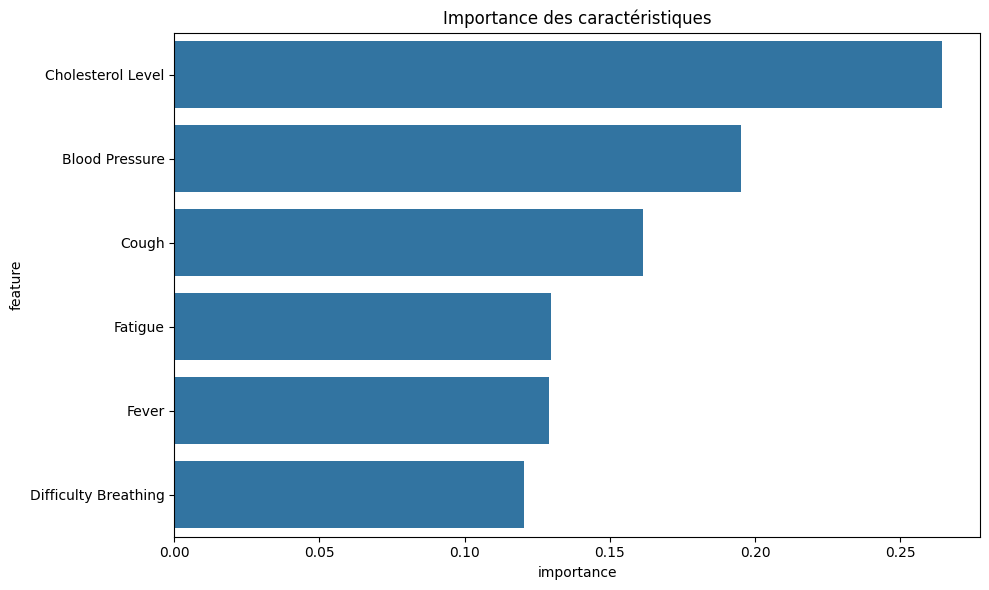

In [25]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_modelrandom.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title("Importance des caractéristiques")
plt.tight_layout()
plt.show()

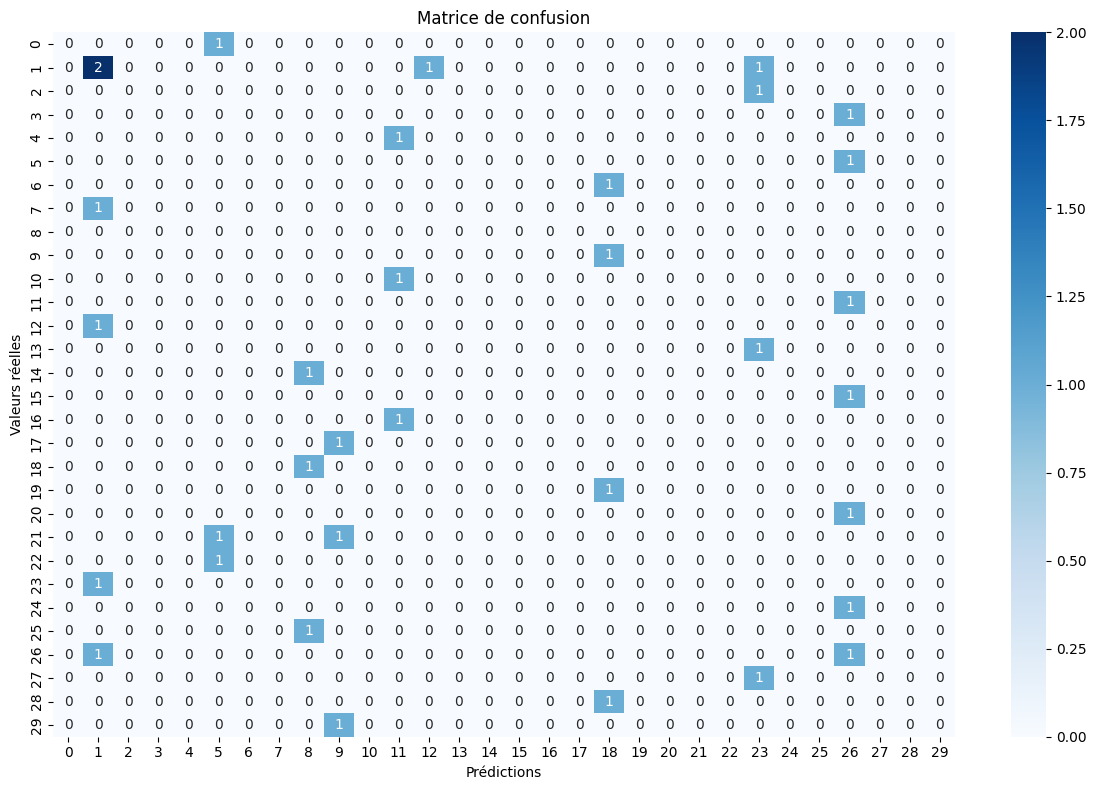

In [26]:
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Valeurs réelles')
plt.tight_layout()
plt.show()

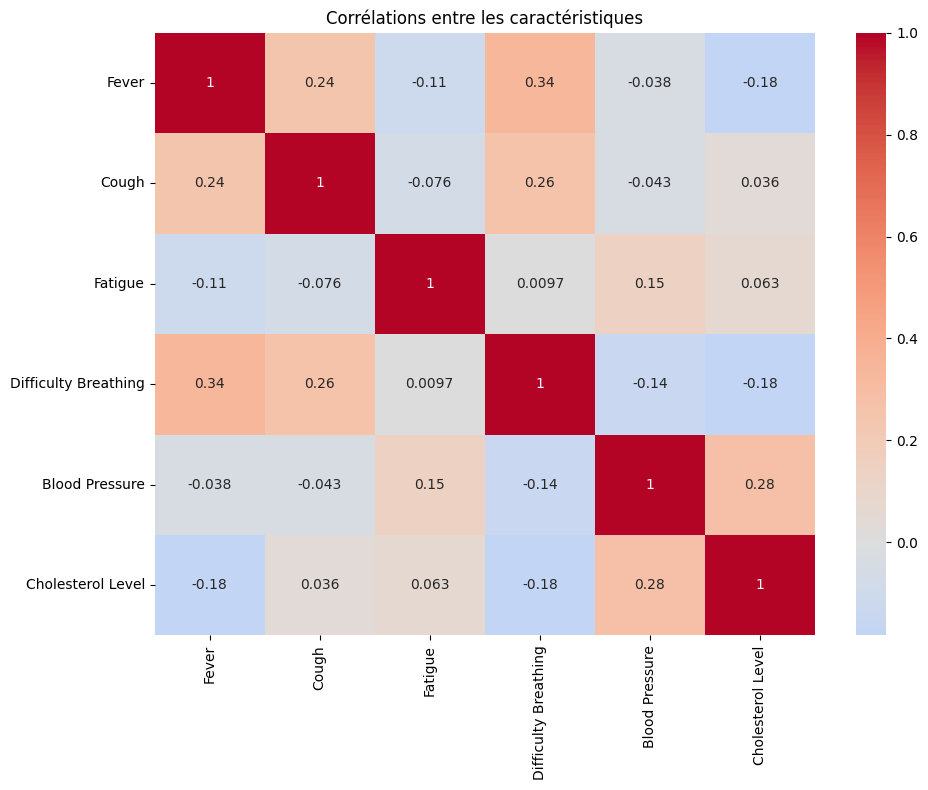

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Corrélations entre les caractéristiques')
plt.tight_layout()
plt.show()

### Predict diseas

In [28]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [31]:
def predict_disease(symptoms, model, scaler, encoder):
    try:
        # Convert symptoms in numeric format
        symptoms_df = pd.DataFrame([symptoms])
        
        # Standardizing data
        symptoms_scaled = scaler.transform(symptoms_df)
        
        # Predict disease
        prediction = model.predict(symptoms_scaled)
        disease = encoder.inverse_transform(prediction)[0]
        
        # Obtein probability
        if hasattr(model, 'predict_proba'):
            probas = model.predict_proba(symptoms_scaled)[0]
            diseases = encoder.inverse_transform(range(len(probas)))
            
            print("\nProbabilités par maladie:")
            for d, p in sorted(zip(diseases, probas), key=lambda x: x[1], reverse=True)[:3]:
                print(f"{d}: {p:.2%}")
        
        return disease
    
    except Exception as e:
        print(f"Erreur lors de la prédiction: {str(e)}")
        print("\nMaladies disponibles pour la prédiction:")
        print(encoder.classes_)
        return None

# Use exemple
example_symptoms = {
    'Fever': 1,              # 1  Yes, 0  No
    'Cough': 3,
    'Fatigue': 1,
    'Difficulty Breathing': 1,
    'Blood Pressure': 2,     # 1  Low, 2 pour , 3  High
    'Cholesterol Level': 2   # 1  Low, 2 pour , 3  High
}

# Uuse Random Forest model
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_scaled, y)

# Make prediction
predicted_disease = predict_disease(example_symptoms, best_model, scaler, encoder)
print(f"\nMaladie prédite: {predicted_disease}")


Probabilités par maladie:
14: 34.46%
29: 18.46%
26: 17.65%

Maladie prédite: 36
